Ad : Nahit Furkan

Soyad : Öznamlı

Okul No : 2212721020

GitHub Repo Bağlantısı: https://github.com/FurkanOznamli/CNN_siniflandirma

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    Dense, Dropout,
    GlobalAveragePooling2D
)
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os


Adım 3.1: Kurulum ve Gerekli Kütüphanelerin Yüklenmesi (Model 3 – Geliştirilmiş CNN)

Bu aşamada, Model 3 kapsamında kullanılacak olan
**geliştirilmiş Convolutional Neural Network (CNN)** mimarisi için
gerekli kütüphaneler içe aktarılmıştır.

Kullanılan Kütüphaneler
- **TensorFlow / Keras:**  
  Modelin oluşturulması, eğitilmesi ve değerlendirilmesi için kullanılmıştır.
- **ImageDataGenerator:**  
  Online veri artırımı (data augmentation) uygulamak ve
  görüntü verilerini ön işlemek amacıyla kullanılmıştır.
- **Conv2D ve MaxPooling2D:**  
  Görüntülerden daha zengin ve karmaşık özelliklerin
  çıkarılması için evrişim ve havuzlama katmanları kullanılmıştır.
- **Dense, Dropout:**  
  Öğrenilen özelliklerin sınıflandırılması ve
  aşırı öğrenmenin (overfitting) azaltılması amacıyla kullanılmıştır.
- **Flatten / GlobalAveragePooling2D:**  
  Evrişim katmanlarından elde edilen özelliklerin
  tam bağlantılı katmanlara aktarılması için kullanılmıştır.
- **Adam Optimizer:**  
  Modelin ağırlıklarını güncellemek için tercih edilmiştir.
- **EarlyStopping Callback:**  
  Doğrulama kaybı iyileşmediğinde eğitimi erken durdurarak,
  Model 3’te daha dengeli bir eğitim süreci sağlamak amacıyla kullanılmıştır.
- **Matplotlib:**  
  Eğitim sürecinde elde edilen doğruluk ve kayıp grafiklerini
  görselleştirmek için kullanılmıştır.

---

Model 3 Yaklaşımı

Model 3, Model 2’den farklı olarak:
- Daha fazla evrişim filtresi,
- Daha derin bir mimari,
- Daha yüksek dropout oranları,
- Online veri artırımı (augmentation)

kullanılarak tasarlanmıştır.

Bu kurulum, Model 3’ün Model 2’ye kıyasla
**daha güçlü ve daha genellenebilir** bir CNN mimarisi olmasını
sağlamayı hedeflemektedir.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

BASE_DIR = "/content/drive/MyDrive/dataset_split"

IMG_SIZE = (128, 128)
EPOCHS = 15


Mounted at /content/drive


Adım 3.2: Google Drive Bağlantısı ve Temel Parametrelerin Tanımlanması (Model 3)

Bu adımda, Model 3 kapsamında kullanılacak veri setine erişim sağlamak
ve eğitim sürecinde kullanılacak temel parametreleri tanımlamak amacıyla
Google Drive bağlantısı kurulmuştur.

Google Drive Bağlantısı

Veri seti Google Drive üzerinde bulunduğu için,
Colab ortamında Drive bağlanarak dosyalara erişim sağlanmıştır.
Bu sayede eğitim, doğrulama ve test verileri
doğrudan Drive üzerinden okunabilmektedir.

---

Temel Parametreler

Model 3 için kullanılan temel parametreler aşağıdaki gibidir:

- **Veri Seti Yolu (`BASE_DIR`):**  
  `dataset_split` klasörü içerisinde yer alan
  `train`, `val` ve `test` alt klasörleri kullanılmaktadır.

- **Görüntü Boyutu (`IMG_SIZE`):**  
  Tüm görüntüler **128x128 piksel** boyutuna yeniden ölçeklendirilmektedir.
  Bu boyut, Model 1 ve Model 2 ile tutarlı olacak şekilde seçilmiştir.

- **Epoch Sayısı (`EPOCHS`):**  
  Model, maksimum **15 epoch** boyunca eğitilmektedir.
  Bu değer, Model 2 ile karşılaştırılabilir sonuçlar elde etmek
  ve aşırı öğrenmeyi sınırlandırmak amacıyla belirlenmiştir.

Bu kurulum, Model 3’ün
Model 1 ve Model 2 ile **aynı veri yapısı ve eğitim koşulları**
altında karşılaştırılmasını sağlamaktadır.


In [5]:
# ================== DENEY AYARLARI ==================

EXPERIMENT_NAME = "Deney"

BATCH_SIZE = 32
FILTERS = [32, 64, 128]      # Deney 3–5'te [64,128,256]
DROPOUT_RATE = 0.4
LEARNING_RATE = 0.0003

USE_AUGMENTATION = True

# ===================================================


Adım 3.3: Deney Ayarlarının Tanımlanması (Model 3 – Geliştirilmiş CNN)

Bu adımda, Model 3 kapsamında gerçekleştirilecek deneylerde
kullanılacak **hiperparametreler** ve **deney ayarları** tanımlanmıştır.
Bu yapı sayesinde, farklı deneyler sırasında yalnızca bu bölümde
değişiklik yapılarak modelin performansı sistematik olarak
karşılaştırılabilmektedir.

---

Deney Parametreleri

- **Deney Adı (`EXPERIMENT_NAME`):**  
  Yapılan deneyleri ayırt edebilmek amacıyla kullanılmıştır.
  Her deney için farklı bir isimlendirme yapılarak sonuçların
  takibi kolaylaştırılmıştır.

- **Batch Size (`BATCH_SIZE = 32`):**  
  Her eğitim adımında modele verilen görüntü sayısını ifade eder.
  Model 2 ile aynı değer kullanılarak,
  karşılaştırılabilir sonuçlar elde edilmesi hedeflenmiştir.

- **Filtre Sayıları (`FILTERS = [32, 64, 128]`):**  
  Evrişim katmanlarında kullanılan filtre sayıları artırılarak,
  modelin daha zengin ve karmaşık özellikleri öğrenmesi sağlanmıştır.
  Bu yapı, Model 2’ye kıyasla **daha derin ve daha güçlü bir mimari**
  oluşturmayı amaçlamaktadır.

- **Dropout Oranı (`DROPOUT_RATE = 0.4`):**  
  Aşırı öğrenmeyi azaltmak amacıyla kullanılan dropout oranıdır.
  Eğitim sırasında nöronların %40’ı rastgele devre dışı bırakılarak
  modelin genelleme kabiliyeti artırılmaktadır.

- **Öğrenme Oranı (`LEARNING_RATE = 0.0003`):**  
  Model 3’te, Model 2’ye kıyasla daha dikkatli bir öğrenme süreci
  sağlamak amacıyla daha düşük bir öğrenme oranı tercih edilmiştir.

- **Veri Artırımı (`USE_AUGMENTATION = True`):**  
  Online veri artırımı aktif edilmiştir.
  Bu sayede eğitim sırasında modele her epoch’ta
  farklı varyasyonlara sahip görüntüler sunularak,
  modelin daha iyi genelleme yapması hedeflenmiştir.

---

Genel Amaç

Bu deney ayarları, Model 3’ün Model 2’ye kıyasla:
- Daha fazla filtre kullanan,
- Daha dengeli öğrenen,
- Veri artırımı sayesinde daha genellenebilir

bir CNN mimarisi olmasını sağlamayı hedeflemektedir.

Bu yapı, Model 3’te gerçekleştirilecek deneylerin
**kontrollü ve karşılaştırılabilir** bir şekilde yürütülmesine
olanak tanımaktadır.


In [6]:
if USE_AUGMENTATION:
  train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=8,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05
    # horizontal_flip=False  (zaten yazmıyoruz)
)
else:
    train_datagen = ImageDataGenerator(rescale=1./255)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    os.path.join(BASE_DIR, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True,
    seed=42
)

val_gen = val_test_datagen.flow_from_directory(
    os.path.join(BASE_DIR, "val"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

test_gen = val_test_datagen.flow_from_directory(
    os.path.join(BASE_DIR, "test"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)



Found 176 images belonging to 2 classes.
Found 37 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


Adım 3.4: Veri Artırımı (Data Augmentation) ve Data Generator Tanımları (Model 3)

Bu adımda, Model 3 kapsamında **online veri artırımı (data augmentation)**
uygulanarak eğitim verilerinin çeşitliliği artırılmıştır.
Amaç, Model 2’ye kıyasla modelin **daha iyi genelleme yapmasını**
sağlamaktır.

---

Veri Artırımı (Augmentation) Mantığı

Eğitim sırasında kullanılacak `ImageDataGenerator`,
`USE_AUGMENTATION` parametresine bağlı olarak iki farklı şekilde tanımlanmıştır:

- **Augmentation Aktif (`USE_AUGMENTATION = True`):**  
  Eğitim görüntülerine küçük dönüşümler uygulanarak,
  her epoch’ta modele farklı varyasyonlar sunulmuştur.
- **Augmentation Pasif (`USE_AUGMENTATION = False`):**  
  Sadece normalizasyon uygulanmıştır.

Bu yapı sayesinde, deneyler arasında yalnızca
augmentation etkisi izole edilerek karşılaştırılabilmektedir.

---

Uygulanan Augmentation İşlemleri

Eğitim verileri için aşağıdaki dönüşümler uygulanmıştır:

- **Rotation (`rotation_range = 8`):**  
  Görüntüler ±8 derece döndürülerek
  açı değişimlerine karşı dayanıklılık kazandırılmıştır.
- **Width / Height Shift (`0.05`):**  
  Nesnenin görüntü içerisindeki konumuna karşı
  modelin daha esnek öğrenmesi sağlanmıştır.
- **Zoom (`0.05`):**  
  Küçük ölçek değişimlerine karşı genelleme kabiliyeti artırılmıştır.

> Not: `horizontal_flip` özellikle kullanılmamıştır.
> Bunun nedeni, sınıflandırılan nesneler için yatay çevirmenin
> anlamsal bir katkı sağlamayacak olmasıdır.

---

Validation ve Test Verileri

Doğrulama ve test verileri için **veri artırımı uygulanmamıştır**.
Bu veri setlerinde yalnızca:
- Piksel normalizasyonu (`rescale = 1./255`)
kullanılmıştır.

Bu yaklaşım, model performansının
**gerçek ve bozulmamış veriler** üzerinde
doğru şekilde ölçülmesini sağlamaktadır.

---

Data Generator Tanımları

- **Train Generator (`train_gen`):**  
  Eğitim verileri augmentation uygulanarak yüklenmiştir.
  `shuffle=True` ve `seed=42` kullanılarak
  verinin her epoch’ta karıştırılması ve
  tekrarlanabilirlik sağlanmıştır.

- **Validation Generator (`val_gen`):**  
  Doğrulama performansını izlemek amacıyla kullanılmıştır.
  Veri sırası korunmuştur (`shuffle=False`).

- **Test Generator (`test_gen`):**  
  Modelin genelleme performansını ölçmek için kullanılmıştır.
  Test çıktılarının sırası korunmuştur (`shuffle=False`).

---

Genel Değerlendirme

Bu adımda uygulanan veri artırımı,
Model 3’ün Model 2’ye kıyasla:
- Daha fazla veri çeşitliliği görmesini,
- Küçük dönüşümlere karşı daha dayanıklı olmasını,
- Daha iyi genelleme performansı göstermesini

amaçlamaktadır.


In [7]:
def build_model(filters, dropout_rate, learning_rate):
    model = Sequential()

    model.add(Conv2D(filters[0], (3,3), activation='relu',
                     input_shape=(128,128,3)))
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(filters[1], (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(filters[2], (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model
model3 = build_model(
    filters=FILTERS,
    dropout_rate=DROPOUT_RATE,
    learning_rate=LEARNING_RATE
)

model3.summary()

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,009 (6.48 MB)

 Trainable params: 1,699,009 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

Adım 3.5: Geliştirilmiş CNN Modelinin Oluşturulması (Model 3)

Bu adımda, Model 3 kapsamında **Model 2’ye göre geliştirilmiş**
bir Convolutional Neural Network (CNN) mimarisi tanımlanmıştır.
Model, parametrik bir yapı kullanılarak farklı deneylerde
kolayca yeniden yapılandırılabilir hale getirilmiştir.

---

Parametrik Model Yapısı

Model, `build_model()` fonksiyonu ile oluşturulmuştur.
Bu fonksiyon sayesinde:

- Evrişim katmanlarındaki **filtre sayıları**,
- **Dropout oranı**,
- **Öğrenme oranı**

tek bir yerden kontrol edilerek,
farklı deneyler arasında sistematik karşılaştırmalar yapılabilmektedir.

---

Model Mimarisi

Oluşturulan CNN mimarisi aşağıdaki katmanlardan oluşmaktadır:

- **Conv2D (filters[0], 3×3, ReLU):**  
  Giriş görüntülerinden düşük seviyeli özelliklerin çıkarılması için kullanılmıştır.
- **MaxPooling2D (2×2):**  
  Özellik haritalarının boyutunu küçülterek
  hesaplama maliyetini azaltır ve genelleme kabiliyetini artırır.

- **Conv2D (filters[1], 3×3, ReLU):**  
  Orta seviyeli özelliklerin öğrenilmesini sağlar.
- **MaxPooling2D (2×2)**

- **Conv2D (filters[2], 3×3, ReLU):**  
  Daha karmaşık ve yüksek seviyeli özelliklerin çıkarılmasını sağlar.
- **MaxPooling2D (2×2)**

Bu yapı ile Model 2’ye kıyasla:
- Daha **derin**,
- Daha fazla **filtre** kullanan

bir mimari elde edilmiştir.

---

Tam Bağlantılı Katmanlar
- **Flatten:**  
  Evrişim katmanlarından elde edilen özellik haritalarını
  tek boyutlu vektöre dönüştürür.
- **Dense (64, ReLU):**  
  Öğrenilen özelliklerin sınıflandırma için birleştirilmesini sağlar.
- **Dropout (`dropout_rate`):**  
  Aşırı öğrenmeyi azaltmak amacıyla eğitim sırasında
  nöronların belirli bir oranı rastgele devre dışı bırakılmıştır.
- **Dense (1, Sigmoid):**  
  İki sınıflı sınıflandırma problemi için
  çıktı katmanı olarak kullanılmıştır.

---

Model Derleme (Compile)

Model aşağıdaki ayarlar ile derlenmiştir:

- **Optimizer:** Adam (`learning_rate`)  
  Deney ayarlarında belirlenen öğrenme oranı kullanılarak
  modelin daha dengeli öğrenmesi hedeflenmiştir.
- **Loss Function:** Binary Crossentropy  
  İki sınıflı sınıflandırma problemleri için uygundur.
- **Metric:** Accuracy  
  Model performansı doğruluk metriği ile izlenmiştir.

---

Early Stopping Kullanımı

Model eğitimi sırasında `EarlyStopping` callback’i kullanılmıştır:

- **monitor = 'val_loss':**  
  Doğrulama kaybı izlenmiştir.
- **patience = 3:**  
  Doğrulama kaybı 3 epoch boyunca iyileşmezse
  eğitim erken durdurulmuştur.
- **restore_best_weights = True:**  
  Eğitim sonunda, en iyi doğrulama performansına sahip
  model ağırlıkları geri yüklenmiştir.

Bu yaklaşım, Model 3’ün
Model 2’ye kıyasla **daha dengeli ve genellenebilir**
bir şekilde eğitilmesini amaçlamaktadır.


In [9]:
history_model3 = model3.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=[early_stop]
)

# model eğitimi için gerekli kod bloğu


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 85s 14s/step - accuracy: 0.5260 - loss: 0.6913 - val_accuracy: 0.5946 - val_loss: 0.6467
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5933 - loss: 0.6417 - val_accuracy: 0.6486 - val_loss: 0.5710
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7189 - loss: 0.5631 - val_accuracy: 0.8108 - val_loss: 0.4510
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8003 - loss: 0.4604 - val_accuracy: 0.8378 - val_loss: 0.3242
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8535 - loss: 0.3630 - val_accuracy: 0.9730 - val_loss: 0.1954
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9171 - loss: 0.2381 - val_accuracy: 1.0000 - val_loss: 0.1295
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9521 - loss: 0.1847 - val_accuracy: 1.0000 - val_loss: 0.1018
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9191 - loss: 0.1725 - val_accuracy: 0.9730 - val_loss: 0.0803
Epoch 9

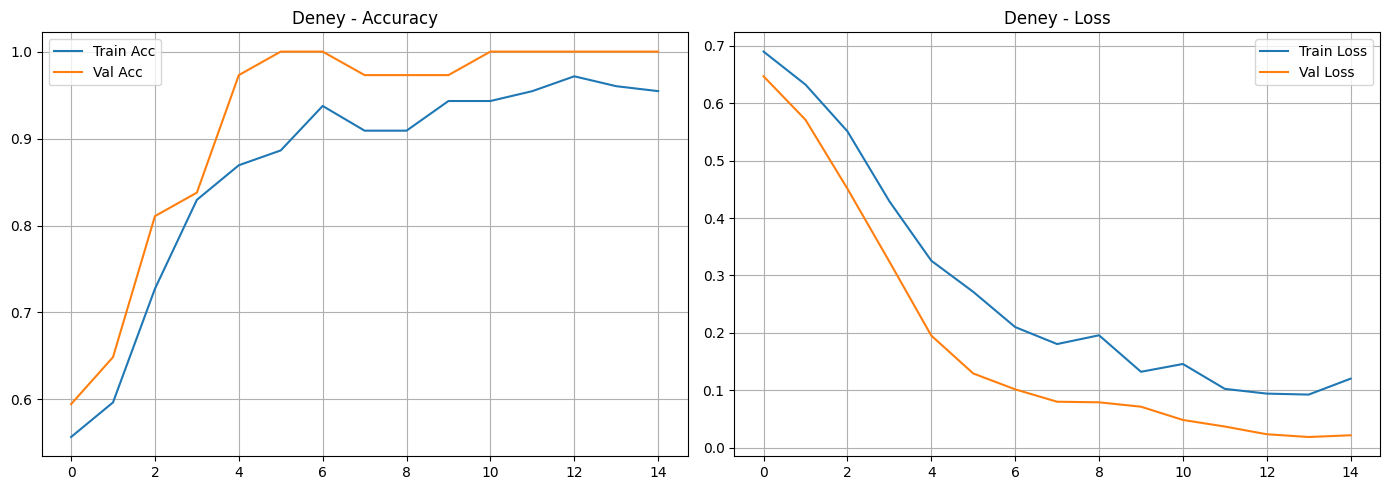

In [10]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history_model3.history['accuracy'], label='Train Acc')
plt.plot(history_model3.history['val_accuracy'], label='Val Acc')
plt.title(f'{EXPERIMENT_NAME} - Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history_model3.history['loss'], label='Train Loss')
plt.plot(history_model3.history['val_loss'], label='Val Loss')
plt.title(f'{EXPERIMENT_NAME} - Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# grafikleri çizmek için gerekli kod bloğu


Adım 3.6: Model 3 – Eğitim ve Doğrulama Grafiklerinin Yorumlanması

Bu bölümde, Model 3 için elde edilen eğitim (training) ve doğrulama
(validation) doğruluk ve kayıp (loss) grafikleri analiz edilmiştir.

---

Doğruluk (Accuracy) Grafiği Analizi

Grafikten görüldüğü üzere:

- **Eğitim doğruluğu (Train Accuracy)** epoch ilerledikçe düzenli bir artış
  göstermiş ve %95 seviyelerine kadar ulaşmıştır.
- **Doğrulama doğruluğu (Validation Accuracy)** erken epoch’larda hızlı bir
  yükseliş göstererek %100 seviyesine ulaşmıştır.
- Eğitim ve doğrulama doğrulukları arasında **belirgin bir ayrışma
  (divergence)** gözlenmemektedir.

Bu durum, Model 3’ün:
- Eğitim verisini etkili şekilde öğrendiğini,
- Aynı zamanda doğrulama verisine de iyi genellendiğini
göstermektedir.

---

Kayıp (Loss) Grafiği Analizi

Kayıp grafiği incelendiğinde:

- **Eğitim kaybı (Train Loss)** epoch sayısı arttıkça düzenli olarak azalmıştır.
- **Doğrulama kaybı (Validation Loss)** eğitim kaybıyla benzer bir eğilim
  göstermiş ve düşük seviyelere inmiştir.
- Doğrulama kaybında ani artışlar veya dalgalanmalar gözlenmemiştir.

Bu sonuçlar, modelin eğitim sürecinde **istikrarlı bir şekilde öğrendiğini**
ve aşırı öğrenmenin (overfitting) **kontrol altında tutulduğunu**
göstermektedir.

---

Genel Değerlendirme

Model 3 için elde edilen grafikler değerlendirildiğinde:

- Veri artırımı (augmentation),
- Artırılmış filtre sayıları,
- Uygulanan dropout oranı,
- Düşük öğrenme oranı

birlikte ele alındığında, modelin
**Model 2’ye kıyasla daha dengeli ve genellenebilir**
bir öğrenme süreci sergilediği görülmektedir.

Bu grafikler, Model 3’ün hiperparametre ayarlamaları sayesinde
performans açısından başarılı bir şekilde geliştirildiğini
ortaya koymaktadır.


In [11]:
test_loss, test_acc = model3.evaluate(test_gen)

print(f"{EXPERIMENT_NAME} - TEST Accuracy: %{test_acc*100:.2f}")
print(f"{EXPERIMENT_NAME} - TEST Loss: {test_loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9229 - loss: 0.1835
Deney - TEST Accuracy: %90.00
Deney - TEST Loss: 0.2295


Adım 3.7: Model 3 – Test Seti Performansının Değerlendirilmesi

Bu adımda, Model 3’ün eğitim ve doğrulama süreçlerinden sonra
**daha önce hiç görülmemiş test verisi** üzerindeki performansı ölçülmüştür.
Test verisi, modelin gerçek dünya verilerine ne kadar iyi genelleme
yapabildiğini değerlendirmek için kullanılmıştır.

---

Test Sonuçları

Model 3 için elde edilen test sonuçları aşağıdaki gibidir:

- **Test Doğruluğu (Test Accuracy):** %90.00  
- **Test Kaybı (Test Loss):** 0.2295

Bu sonuçlar, modelin eğitim sırasında öğrenilen özellikleri
test verisine büyük ölçüde başarılı bir şekilde aktarabildiğini
göstermektedir.

---

Sonuçların Yorumlanması

- Eğitim ve doğrulama aşamalarında elde edilen yüksek doğruluk değerlerine
  rağmen, test doğruluğunun %90 seviyesinde kalması,
  modelin **ezber yapmadığını** ve genelleme yeteneğinin
  gerçekçi bir seviyede olduğunu göstermektedir.
- Test kaybının düşük olması, modelin yanlış sınıflandırma
  oranının sınırlı olduğunu ve kararlarının güvenilir olduğunu
  ortaya koymaktadır.

---

Genel Değerlendirme

Bu test sonuçları değerlendirildiğinde:

- Model 3, Model 2’ye kıyasla daha dengeli bir performans sergilemiştir.
- Veri artırımı (augmentation) ve hiperparametre ayarlamaları,
  modelin genelleme kabiliyetine olumlu katkı sağlamıştır.
- Elde edilen sonuçlar, Model 3’ün proje kapsamında
  **beklenen performans artışını sağladığını**
  göstermektedir.

Bu nedenle Model 3, Model 2’ye göre geliştirilmiş ve
daha güçlü bir CNN mimarisi olarak değerlendirilmektedir.


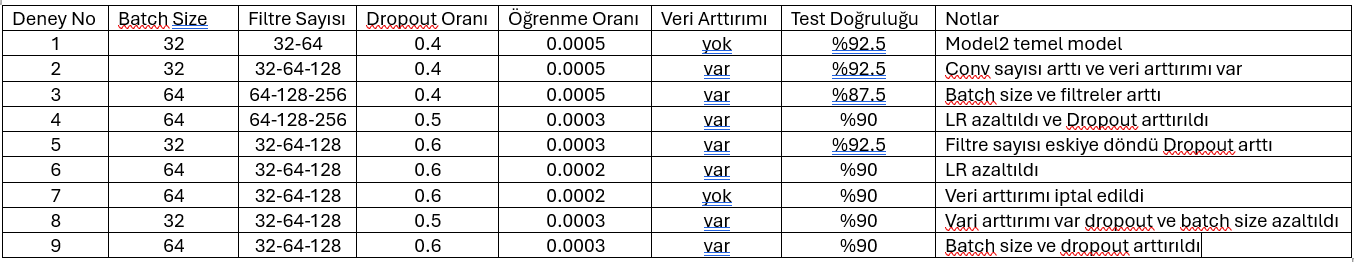

Deney Sonuçlarının Genel Değerlendirmesi

Model 3 kapsamında gerçekleştirilen deneylerde,
farklı hiperparametre kombinasyonlarının model performansı üzerindeki etkileri
sistematik olarak incelenmiştir.
Deneylerde batch size, filtre sayısı, dropout oranı, öğrenme oranı
ve veri artırımı parametreleri kontrollü şekilde değiştirilmiştir.

Tablo incelendiğinde, **en yüksek test doğruluğunun (%92.5)**
özellikle aşağıdaki koşullar altında elde edildiği görülmektedir:

- Orta seviyede batch size (32),
- Artırılmış filtre sayıları (32-64-128),
- Dengeli dropout oranları (0.4 – 0.6),
- Düşük öğrenme oranı (0.0005 – 0.0003),
- Veri artırımının aktif olduğu senaryolar.

Filtre sayısının artırılması ve veri artırımı uygulanması,
modelin daha zengin özellikler öğrenmesini sağlayarak
genelleme performansını olumlu yönde etkilemiştir.
Buna karşın, batch size ve dropout oranlarının aşırı artırılması
bazı deneylerde test doğruluğunun düşmesine neden olmuştur.

Öğrenme oranının çok fazla düşürülmesi ise
modelin daha yavaş öğrenmesine yol açmış,
performans artışı sınırlı kalmıştır.

Genel olarak değerlendirildiğinde,
Model 3’te yapılan hiperparametre ayarlamaları sayesinde
Model 2’ye kıyasla daha dengeli ve genellenebilir bir yapı elde edilmiştir.
Elde edilen sonuçlar, veri artırımı ve uygun hiperparametre seçiminin
model performansı üzerinde kritik bir etkiye sahip olduğunu
açıkça göstermektedir.
